# wine quality prediction
In this notebook we will predict the wine quality using different classification algorithms and select the best one to on which we train our model.
###  note
we also use the ensamble technique to enhance our model performace











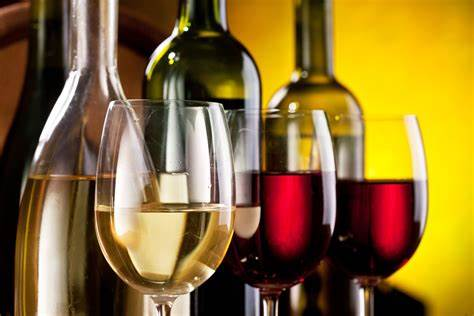

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("wine.data")

In [3]:
df.head(1)

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1   13.2  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05   3.4   

   1065  
0  1050

In [4]:

df.columns = ["alcohol","malic acid","ash","alcalinity of ash","magnesium","total phenols",
"falavanoids","nonflavanoid phenols","proanthocyanins","color intensity","hue","od280/od315","proline", "proqine"]
df.head(1)


alcohol  malic acid   ash  alcalinity of ash  magnesium  total phenols  \
0        1        13.2  1.78               2.14       11.2            100   

   falavanoids  nonflavanoid phenols  proanthocyanins  color intensity   hue  \
0         2.65                  2.76             0.26             1.28  4.38   

   od280/od315  proline  proqine  
0         1.05      3.4     1050

# Analysis based on different graph

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

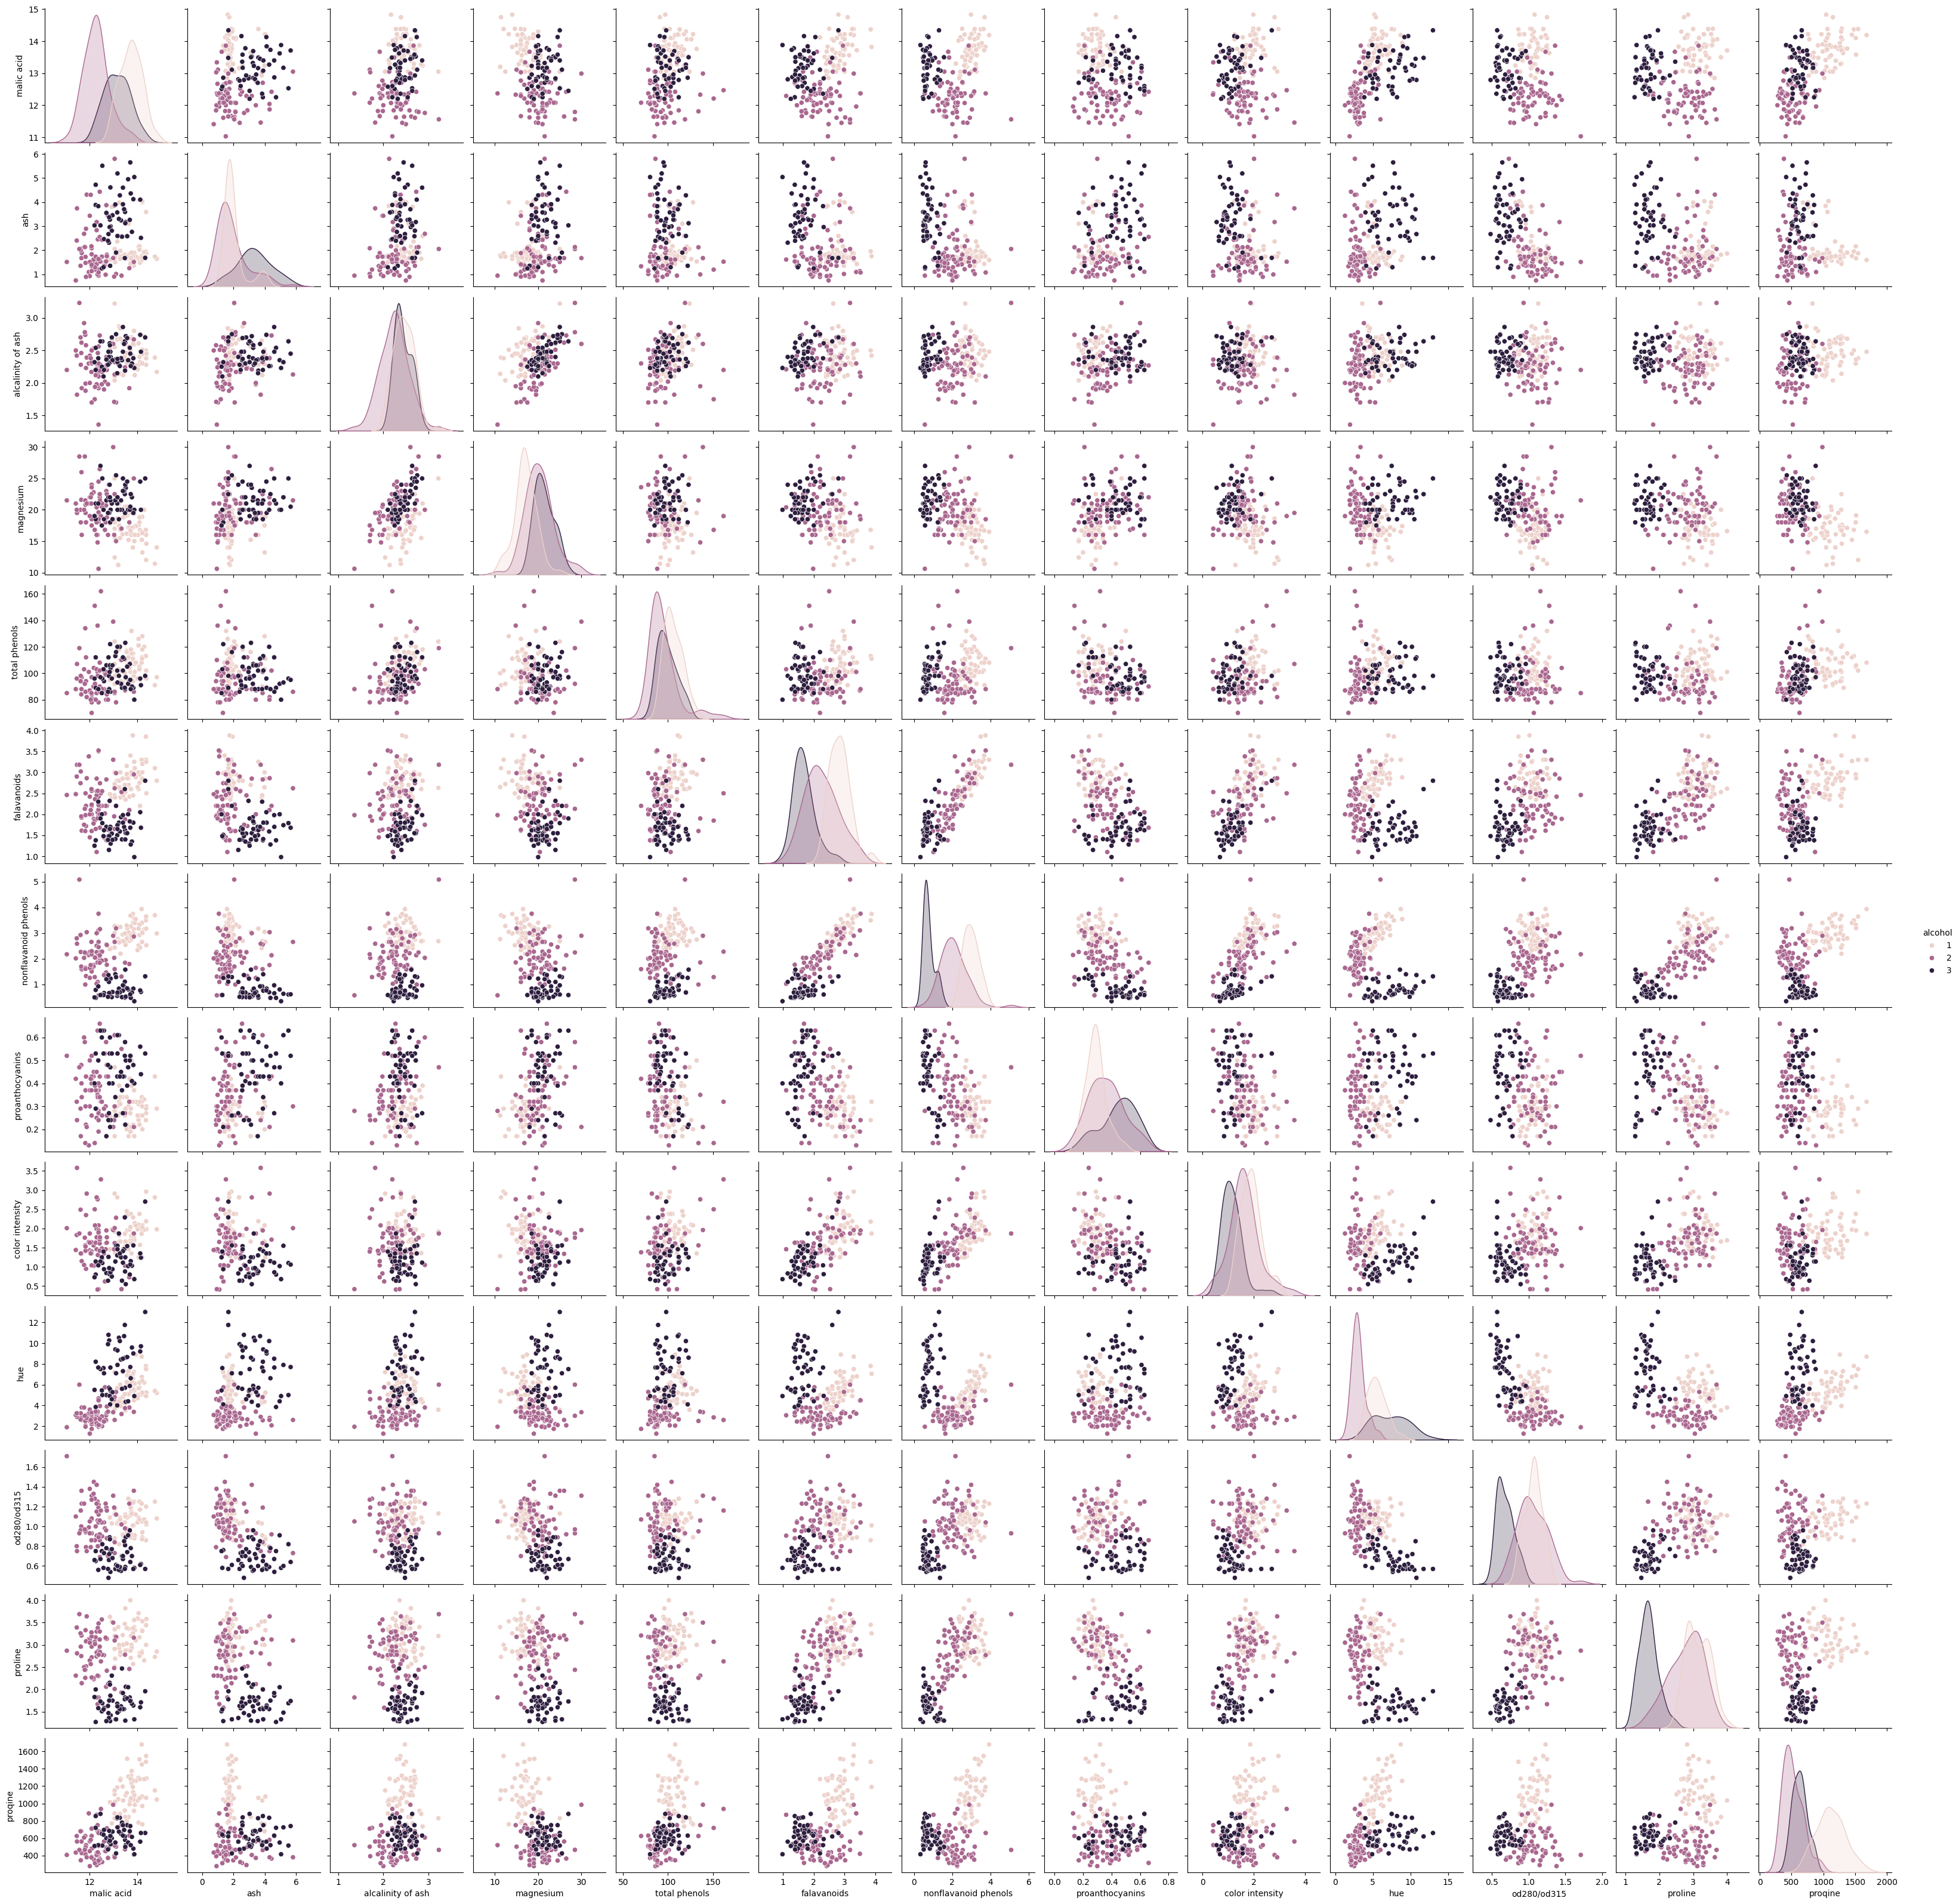

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='alcohol')
plt.show()

In [13]:

correlation_with_alcohol = df.corr()['alcohol'].sort_values()
print(correlation_with_alcohol)


nonflavanoid phenols   -0.846485
proline                -0.786428
falavanoids            -0.717933
proqine                -0.631227
od280/od315            -0.617690
color intensity        -0.494887
malic acid             -0.321238
total phenols          -0.198944
alcalinity of ash      -0.048260
hue                     0.268562
ash                     0.436127
proanthocyanins         0.487215
magnesium               0.513963
alcohol                 1.000000
Name: alcohol, dtype: float64


In [ ]:
df['alcohol'].unique()

array([1, 2, 3])

In [ ]:
df.isnull().sum()

alcohol                 0
malic acid              0
ash                     0
alcalinity of ash       0
magnesium               0
total phenols           0
falavanoids             0
nonflavanoid phenols    0
proanthocyanins         0
color intensity         0
hue                     0
od280/od315             0
proline                 0
ehti                    0
dtype: int64

In [14]:
x = df.drop('alcohol', axis=1)
y = df['alcohol']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


results = {}
for model_name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  results[model_name] = accuracy


for model_name, accuracy in results.items():
  print(f"{model_name}: {accuracy:.4f}")


Logistic Regression: 0.8889
Decision Tree: 0.8611
Random Forest: 0.9444
Support Vector Machine: 0.9444
K-Nearest Neighbors: 0.8889
Naive Bayes: 0.9167


# here we will use the voting ensamble technique to enhance the model performance

In [17]:


from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='hard')

voting_clf.fit(x_train, y_train)

y_pred_voting = voting_clf.predict(x_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)

print(f"Voting Classifier: {accuracy_voting:.4f}")


Voting Classifier: 0.9444


In [18]:
#  the 4 different instance for the random forest and create a voting ensamble


rf1 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf2 = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf3 = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
rf4 = RandomForestClassifier(n_estimators=200, max_depth=25, random_state=42)


voting_clf_rf = VotingClassifier(estimators=[
    ('rf1', rf1),
    ('rf2', rf2),
    ('rf3', rf3),
    ('rf4', rf4)
], voting='soft')


voting_clf_rf.fit(x_train, y_train)


y_pred_voting_rf = voting_clf_rf.predict(x_test)


accuracy_voting_rf = accuracy_score(y_test, y_pred_voting_rf)

print(f"Voting Classifier (Random Forest Ensemble): {accuracy_voting_rf:.4f}")


Voting Classifier (Random Forest Ensemble): 0.9722


this is how we have seen that our model accuracy has increased from 94 percent to 97 percent using the voting ensamble technique